<a href="https://colab.research.google.com/github/Dansah2/Udacity_Tutorials/blob/main/Udacity_NLP_Subwords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# obtain the dataset
!wget --no-check-certificate \
    https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P \
    -O /tmp/sentiment.csv

--2023-06-27 21:38:47--  https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.google.com (drive.google.com)... 74.125.132.139, 74.125.132.138, 74.125.132.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.132.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s9rnncpkh2k9cf6jeaiic04b31tdacrr/1687901925000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P?uuid=904f9753-9596-4dc2-bd4c-4557b5e054f4 [following]
--2023-06-27 21:38:47--  https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s9rnncpkh2k9cf6jeaiic04b31tdacrr/1687901925000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P?uuid=904f9753-9596-4dc2-bd4c-4557b5e054f4
Resolving doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)... 142.251.120.132, 2607:f8b0:4001:c2e::84
Connecting to doc-0

In [3]:
# read in the data
import pandas as pd
dataset = pd.read_csv('/tmp/sentiment.csv')

#define the sentences and labels
sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

In [4]:
# create subword dataset
import tensorflow_datasets as tfds

vocab_size = 1000
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(sentences, vocab_size, max_subword_length=5)

In [5]:
# check that the tokenizer works properly
num = 5
print(sentences[num])
encoded = tokenizer.encode(sentences[num])
print(encoded)

# print out each subword
for i in encoded:
  print(tokenizer.decode([i]))

I have to jiggle the plug to get it to line up right to get decent volume.
[4, 31, 6, 849, 162, 450, 12, 1, 600, 438, 775, 6, 175, 14, 6, 55, 213, 159, 474, 775, 6, 175, 614, 380, 295, 148, 72, 789]
I 
have 
to 
j
ig
gl
e 
the 
pl
ug
 
to 
get 
it 
to 
li
ne 
up 
right
 
to 
get 
dec
ent 
vo
lu
me
.


In [6]:
# replace the sentence data with encoded subwords
for i, sentence in enumerate(sentences):
  sentences[i] = tokenizer.encode(sentence)

In [7]:
# check to make sure the sentences have been replaced
print(sentences[1])

[625, 677, 626, 274, 380, 633, 148, 844, 789]


In [9]:
#final pre-processing
import numpy as np

# set hyperparameters
max_length = 50
trunc_type = 'post'
padding_type = 'post'

# pad all sentences
sentences_padded = pad_sequences(sentences, maxlen=max_length,
                                 padding=padding_type, truncating=trunc_type)

# set training and test sets
training_size = int(len(sentences) * 0.8)

training_sentences = sentences_padded[0:training_size]
training_labels = labels[0:training_size]
testing_sentences = sentences_padded[training_size:]
testing_labels = labels[training_size:]

# make labels into numpy arrays
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


In [10]:
# train the sentiment model
embedding_dim = 16
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            16000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 16,109
Trainable params: 16,109
Non-trainable params: 0
_________________________________________________________________


In [12]:
# set hyperparameters and compile model
num_epochs = 30
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(training_sentences, training_labels_final, epochs=num_epochs,
                    validation_data=(testing_sentences, testing_labels_final))

Epoch 1/30
50/50 [==============================] - 1s 4ms/step - loss: 0.6930 - accuracy: 0.5173 - val_loss: 0.6941 - val_accuracy: 0.4110
Epoch 2/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5248 - val_loss: 0.6945 - val_accuracy: 0.4160
Epoch 3/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5386 - val_loss: 0.6929 - val_accuracy: 0.4561
Epoch 4/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.6026 - val_loss: 0.6874 - val_accuracy: 0.5113
Epoch 5/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.6717 - val_loss: 0.6728 - val_accuracy: 0.6291
Epoch 6/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6454 - accuracy: 0.7288 - val_loss: 0.6501 - val_accuracy: 0.7218
Epoch 7/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6150 - accuracy: 0.7759 - val_loss: 0.6246 - val_accuracy: 0.7444
Epoch 8/30
50/50 [==

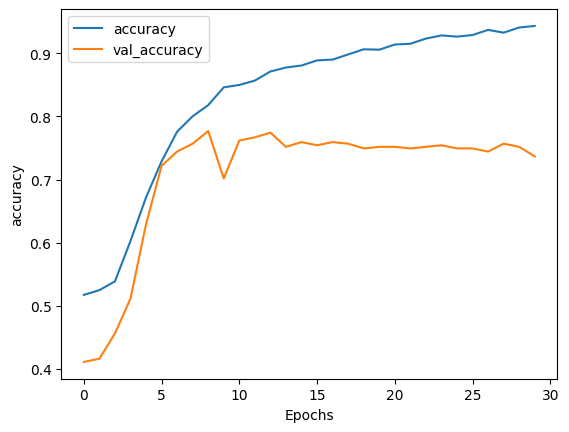

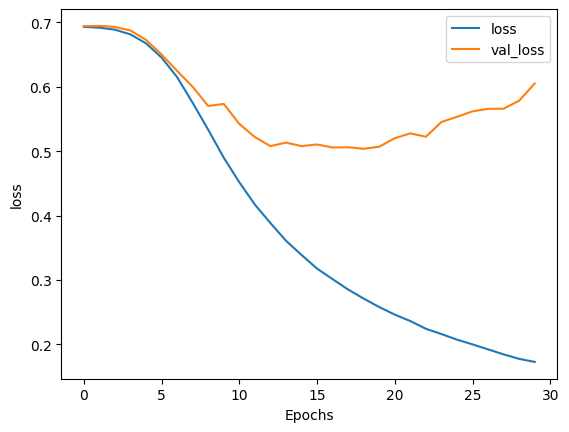

In [13]:
#visulize the training data
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [14]:
# get files for visulizing the network

#get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(1000, 16)


In [15]:
import io

# write the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(0, vocab_size - 1):
  word = tokenizer.decode([word_num])
  embeddings = weights[word_num]
  out_m.write(word + '\n')
  out_v.write('\t'.join([str(x) for x in embeddings]) + '\n')

out_v.close()
out_m.close()

In [16]:
# download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>